### Import datasets and merge them together as one file

In [1]:
import pandas as pd

from sklearn.inspection import permutation_importance
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

from xgboost import XGBClassifier
from xgboost import plot_importance

import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import time

from sklearn.ensemble import RandomForestRegressor
import xgboost
from boruta import BorutaPy

In [2]:
df_1 = pd.read_csv("UNSW-NB15_1.csv",low_memory=False)
df_2 = pd.read_csv("UNSW-NB15_2.csv",low_memory=False)
df_3 = pd.read_csv("UNSW-NB15_3.csv",low_memory=False)
df_4 = pd.read_csv("UNSW-NB15_4.csv",low_memory=False)


In [15]:
df = pd.concat([df_1, df_2, df_3, df_4])

### Perform data cleaning processes
* Clearing white spaces
* Identifying and handling missing data values
* Converting categorical data into numerical data
* Converting all columns to integer or float data types


In [16]:
#--------------------------------#
### Cleaning the target column ###
df['attack_cat'] = df['attack_cat'].str.strip()
df['attack_cat'] = df['attack_cat'].fillna('Normal')
df['attack_cat'].replace(
    ['Normal','Reconnaissance','Backdoors','Backdoor','DoS','Exploits','Analysis','Fuzzers','Worms','Shellcode','Generic'],
    [0,1,2,2,3,4,5,6,7,8,9],
    inplace=True)

#---------------------------#
### Cleaning column proto ###
df['proto'].replace(
    ['udp','argus','trunk-1','mfe-nsp','ipv6-frag','skip','kryptolan','vmtp','mtp','pnni','cphb','fc','ipx-n-ip','smp','ib','arp','chaos','trunk-2','merit-inp','ipv6-route','tlsp','sat-mon','ttp','ax.25','qnx','iso-tp4','iso-ip','pgm','isis','tcp','egp','xns-idp','3pc','idrp','ipv6-no','cpnx','vines','ipip','scps','wb-expak','etherip','vrrp','ptp','igmp','emcon','leaf-1','idpr','mhrp','any','wsn','nsfnet-igp','aes-sp3-d','cbt','sep','pim','l2tp','fire','ospf','nvp','leaf-2','ddp','i-nlsp','ipv6-opts','pvp','dgp','micp','bbn-rcc','secure-vmtp','aris','zero','crtp','sctp','pup','irtp','idpr-cmtp','rvd','cftp','br-sat-mon','eigrp','encap','igp','xtp','a/n','ddx','crudp','gre','xnet','rdp','tp++','mobile','sat-expak','sun-nd','tcf','pri-enc','bna','il','ipcomp','iatp','sccopmce','ggp','mux','netblt','ipv6','narp','ippc','wb-mon','sprite-rpc','gmtp','swipe','rsvp','snp','stp','iplt','ip','ipnip','st2','dcn','hmp','prm','sdrp','larp','ifmp','visa','unas','compaq-peer','srp','pipe','ipcv','uti','sps','sm','icmp','rtp','udt','esp'],
    [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135],
    inplace=True)

#-----------------------------#
### Cleaning column service ###
df['service'].replace(
    ['-','http','ftp','ftp-data','smtp','pop3','dns','snmp','ssl','dhcp','irc','radius','ssh'],
    [0,1,2,3,4,5,6,7,8,9,10,11,12],
    inplace=True)

#---------------------------#
### Cleaning column state ###
df['state'].replace(
    ['no','INT','FIN','REQ','ACC','CON','RST','CLO','ECO','PAR','URN','URH','TXD','MAS','TST','ECR'],
    [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15],
    inplace=True)

#--------------------------------#
### Cleaning column ct_ftp_cmd ###
df['ct_ftp_cmd'].replace(
    [' '],
    ['0'],
    inplace=True)

df['ct_ftp_cmd'] = pd.to_numeric(df['ct_ftp_cmd'])
df['ct_ftp_cmd'].unique()

df = df.fillna(method='ffill')

## Scenario - using ALL features provided

### Preparing training and testing datasets

*except for naturally unrelevant data such as srcip, sport, dstip, dsport, Stime, Ltime

In [5]:
X = df.drop(columns=['srcip','sport','dstip','dsport','Stime','Ltime','Label','attack_cat'])
y = df['attack_cat']

### Splitting training & testing datasets - 70 & 30

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

### Decision Tree

In [7]:


start_time = time.time()

classifier = DecisionTreeClassifier()
classifier.fit(X_train,y_train)

elapsed_time = time.time() - start_time
print(f"Elapsed time to train the Decision Tree model: {elapsed_time:.3f} seconds")


Elapsed time to train the Decision Tree model: 16.949 seconds


In [8]:
y_pred = classifier.predict(X_test)

In [9]:

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    665706
           1       0.89      0.76      0.82      4208
           2       0.27      0.09      0.14       658
           3       0.32      0.34      0.33      4934
           4       0.63      0.73      0.68     13343
           5       0.38      0.10      0.15       820
           6       0.60      0.56      0.58      7370
           7       0.36      0.41      0.38        49
           8       0.60      0.54      0.57       457
           9       1.00      0.99      0.99     64470

    accuracy                           0.98    762015
   macro avg       0.60      0.55      0.56    762015
weighted avg       0.98      0.98      0.98    762015



### Random Forest

In [74]:

start_time = time.time()

forest = RandomForestClassifier(random_state=1)
forest.fit(X_train, y_train)

elapsed_time = time.time() - start_time
print(f"Elapsed time to train the Random Forest model: {elapsed_time:.3f} seconds")

Elapsed time to train the Random Forest model: 232.451 seconds


In [75]:
start_time = time.time()

y_rf_pred = forest.predict(X_test)

elapsed_time = time.time() - start_time
print(f"Elapsed time to predict/test: {elapsed_time:.3f} seconds")

Elapsed time to predict/test: 6.814 seconds


In [76]:
print(classification_report(y_test, y_rf_pred))

              precision    recall  f1-score   support

           1       1.00      1.00      1.00    665706
           2       0.92      0.76      0.83      4208
           3       0.51      0.09      0.15       658
           4       0.34      0.27      0.30      4934
           5       0.63      0.81      0.71     13343
           6       0.63      0.08      0.13       820
           7       0.69      0.57      0.63      7370
           8       0.44      0.16      0.24        49
           9       0.66      0.61      0.63       457
          10       1.00      0.99      0.99     64470

    accuracy                           0.98    762015
   macro avg       0.68      0.53      0.56    762015
weighted avg       0.98      0.98      0.98    762015



### XGBoost

In [10]:
start_time = time.time()

xgb = XGBClassifier(random_state=1,use_label_encoder=False,num_class=11)
xgb.fit(X_train, y_train)
elapsed_time = time.time() - start_time
print(f"Elapsed time to train the XGBoost model: {elapsed_time:.3f} seconds")

[11:45:55] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Elapsed time to train the XGBoost model: 498.888 seconds


In [11]:
start_time = time.time()

y_pred = xgb.predict(X_test)

elapsed_time = time.time() - start_time
print(f"Elapsed time to predict/test: {elapsed_time:.3f} seconds")

Elapsed time to predict/test: 1.224 seconds


In [12]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    665706
           1       0.93      0.77      0.84      4208
           2       0.67      0.01      0.03       147
           3       0.46      0.30      0.36      5445
           4       0.65      0.83      0.73     13343
           5       0.81      0.07      0.13       820
           6       0.67      0.54      0.60      7370
           7       0.66      0.47      0.55        49
           8       0.71      0.72      0.71       457
           9       1.00      0.99      0.99     64470

    accuracy                           0.98    762015
   macro avg       0.75      0.57      0.59    762015
weighted avg       0.98      0.98      0.98    762015



### Support Vector Machines (SVM)

In [ ]:
y_train

In [ ]:
X=X.head(2000)

y=y.head(2000)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

X_train = sc.fit_transform(X_train)

X_test = sc.transform(X_test)

In [ ]:
from sklearn.svm import SVC

classifier = SVC(kernel = 'poly', random_state = 0)

model_svm=classifier.fit(X_train, y_train)

In [ ]:
y_pred=classifier.predict(sc.transform(X_test))

In [ ]:
from sklearn.metrics import accuracy_score

accuracy_score(y_test, y_pred)

# Feature Selection Techniques


### Feature Importance Using Mean decrease in impurity

In [67]:
feature_names = list(X_train.columns)

In [70]:

##using time here to calculate how it takes to perform feature importance on model
start_time = time.time()
importances = forest.feature_importances_
std = np.std([tree.feature_importances_ for tree in forest.estimators_], axis=0)
elapsed_time = time.time() - start_time

print(f"Elapsed time to compute the importances: {elapsed_time:.3f} seconds")

Elapsed time to compute the importances: 0.035 seconds


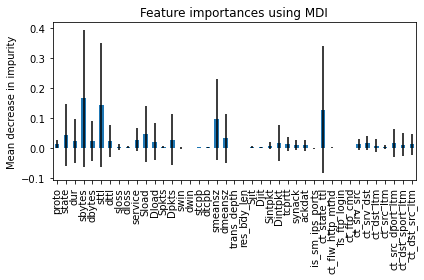

In [71]:
forest_importances = pd.Series(importances, index=feature_names)

fig, ax = plt.subplots()
forest_importances.plot.bar(yerr=std, ax=ax)
ax.set_title("Feature importances using MDI")
ax.set_ylabel("Mean decrease in impurity")
fig.tight_layout()

### Permutation Feature Importance technique

In [77]:
start_time = time.time()
result = permutation_importance(
    forest, X_test, y_test, n_repeats=10, random_state=1, n_jobs=2
)
elapsed_time = time.time() - start_time
print(f"Elapsed time to compute the importances: {elapsed_time:.3f} seconds")

forest_importances = pd.Series(result.importances_mean, index=feature_names)

Elapsed time to compute the importances: 1613.266 seconds


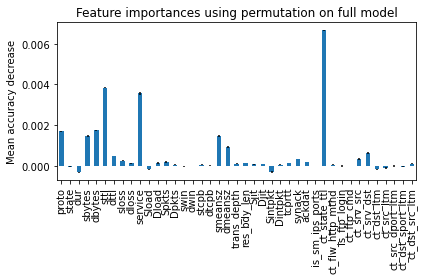

In [79]:
fig, ax = plt.subplots()
forest_importances.plot.bar(yerr=result.importances_std, ax=ax)
ax.set_title("Feature importances using permutation on full model")
ax.set_ylabel("Mean accuracy decrease")
fig.tight_layout()
plt.show()

### XGBoost

In [27]:
xgb = XGBClassifier(random_state=1,use_label_encoder=False,num_class=11)
xgb.fit(X_train, y_train)

[12:44:31] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=16,
              num_class=11, num_parallel_tree=1, objective='multi:softprob',
              predictor='auto', random_state=1, reg_alpha=0, reg_lambda=1,
              scale_pos_weight=None, subsample=1, tree_method='exact',
              use_label_encoder=False, validate_parameters=1, ...)

In [29]:
print("Feature Importances : ", xgb.feature_importances_)

Feature Importances :  [1.35127511e-02 6.35572011e-03 4.41526208e-04 4.30812426e-02
 4.55507124e-03 4.31208387e-02 1.61847621e-01 1.57168484e-03
 1.37525052e-03 1.31525891e-02 5.68454503e-04 5.19908208e-04
 6.70270354e-04 1.60624785e-03 6.88925339e-03 0.00000000e+00
 1.69610154e-04 1.79231880e-04 2.36879638e-03 1.65492401e-03
 1.27265335e-03 1.12176186e-03 2.85221846e-04 3.83864768e-04
 9.15339449e-04 3.90356465e-04 2.94323865e-04 3.78145813e-03
 2.10459868e-04 6.63848405e-05 6.60299361e-01 1.31337461e-03
 1.22358149e-03 6.41774735e-04 6.86285086e-04 7.01560033e-03
 2.33921630e-04 1.55360744e-04 5.81633882e-04 1.09764915e-02
 4.50988254e-03]


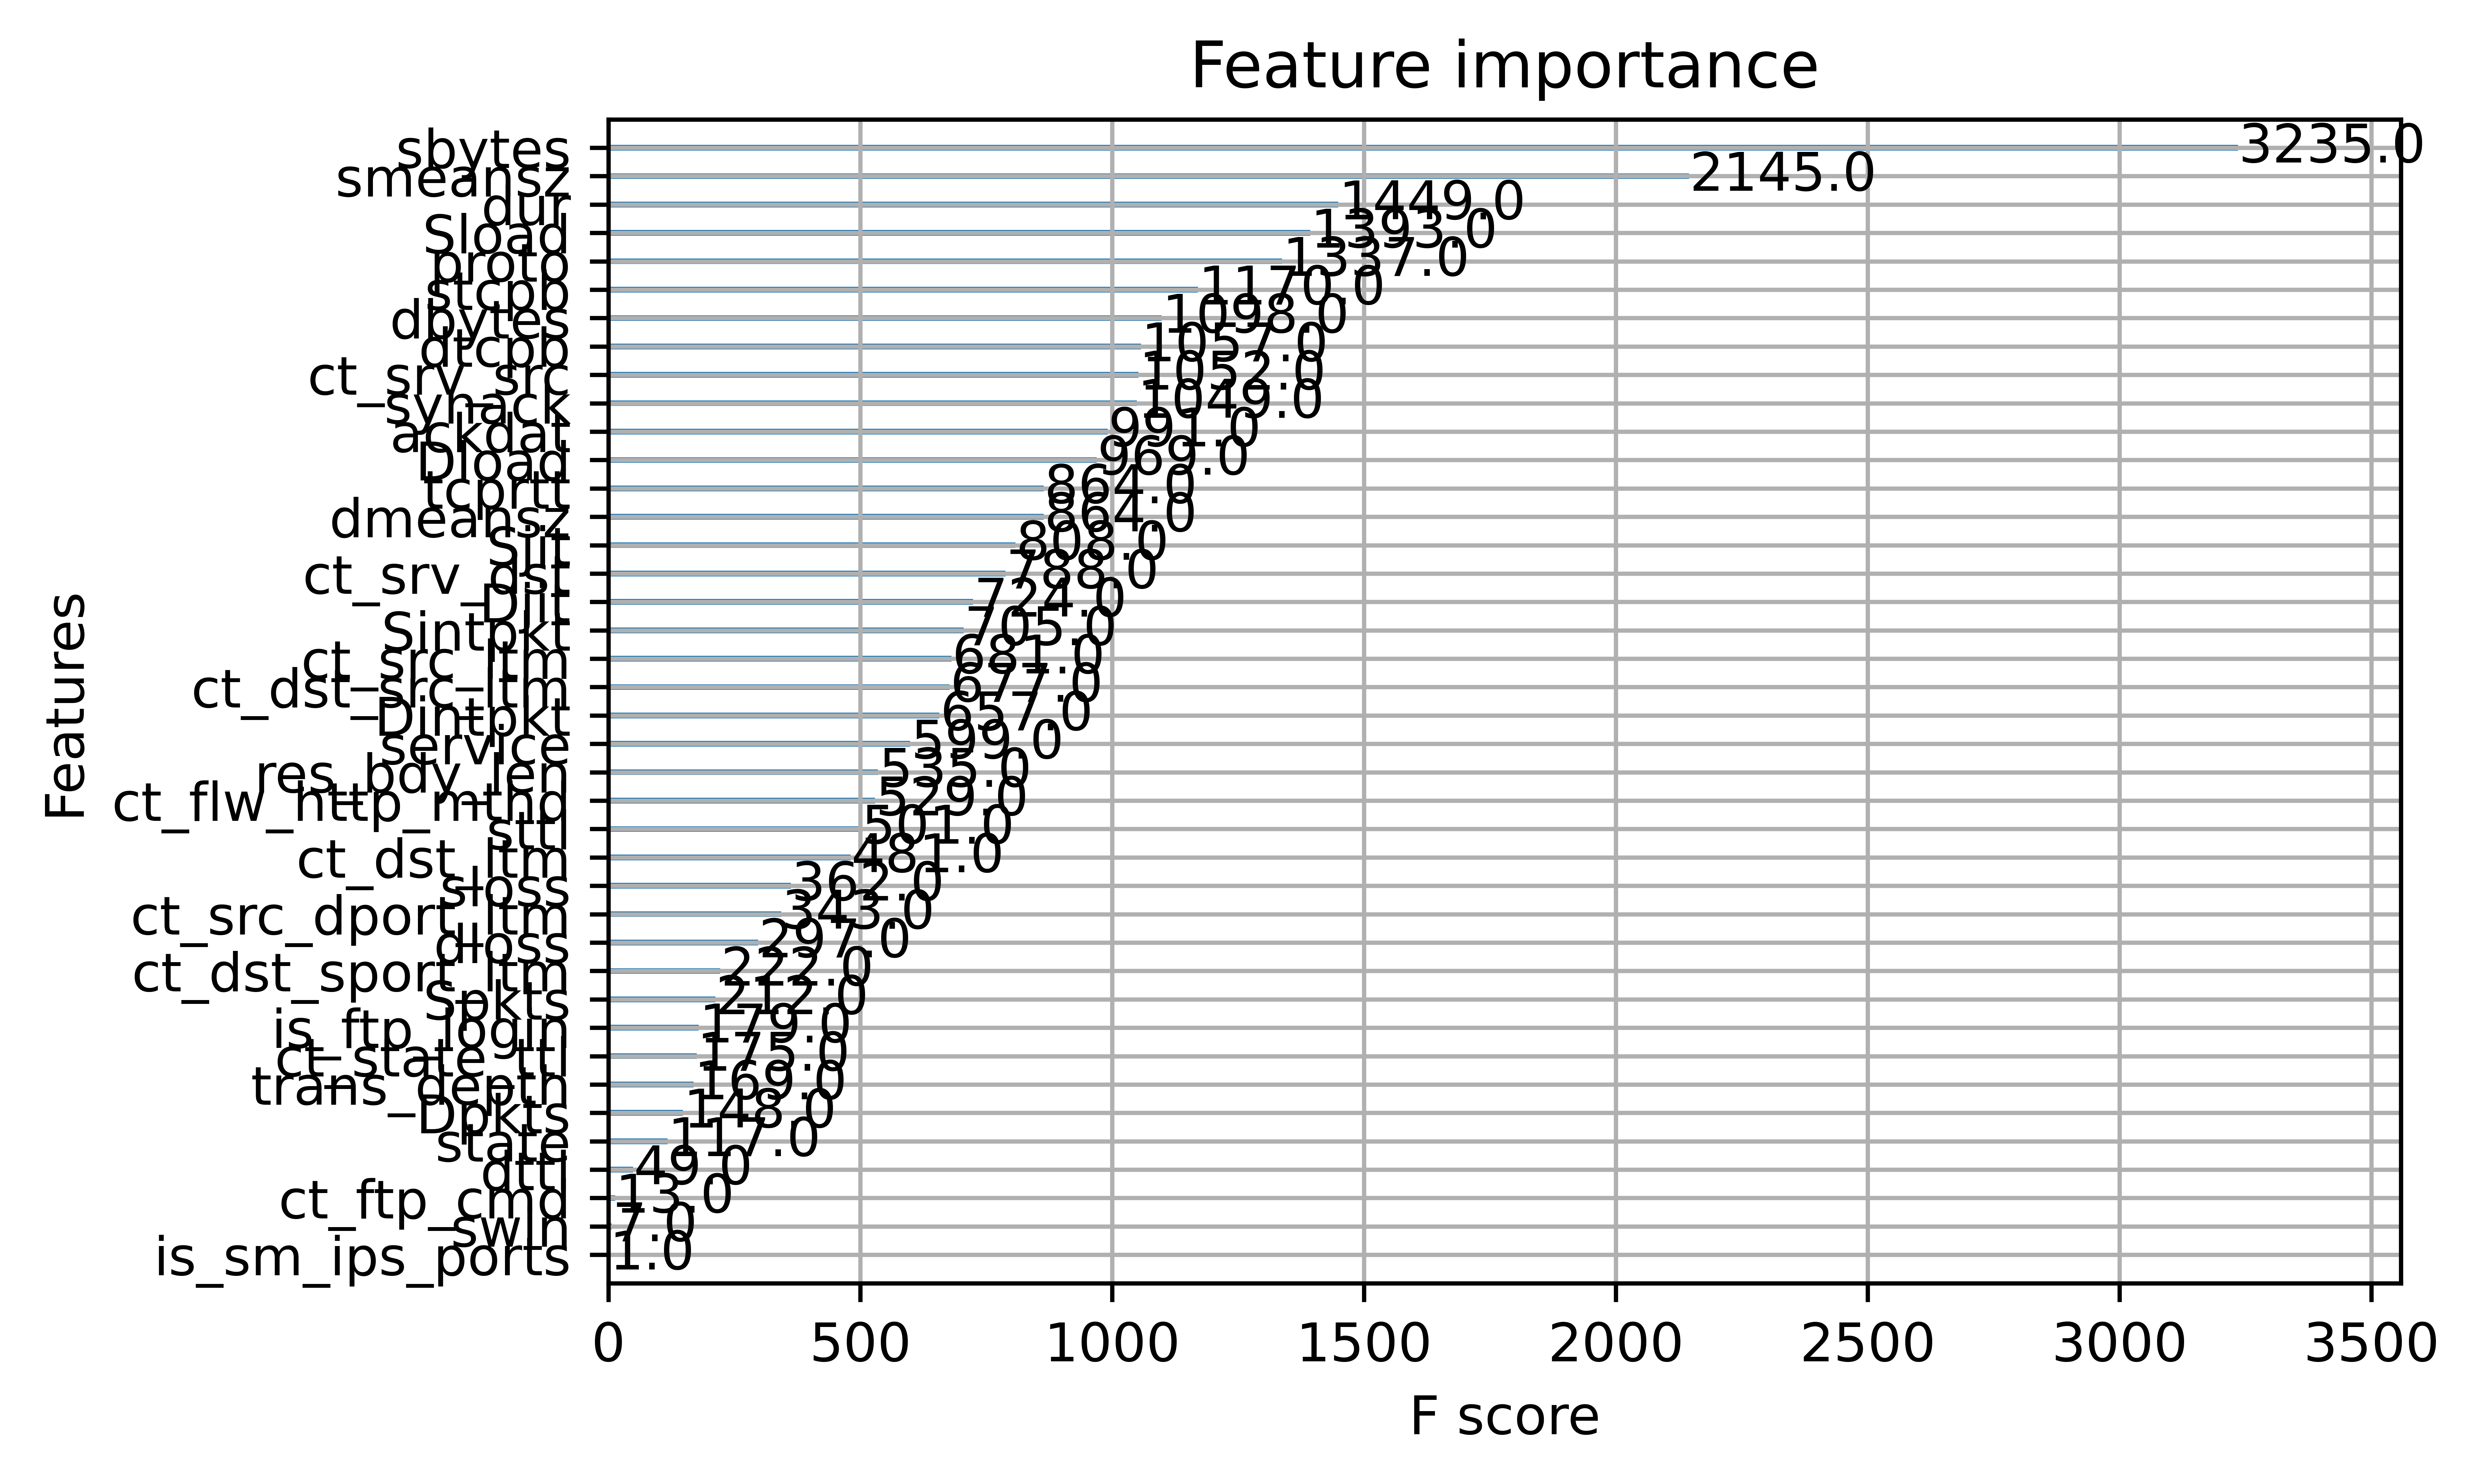

<Figure size 800x800 with 0 Axes>

In [43]:
plot_importance(xgb)
my_dpi = 960
plt.figure(figsize=(800/my_dpi, 800/my_dpi), dpi=my_dpi)
plt.show()

## Scenario: Top 10 Features Based on Feature Importance
*Features: 'ct_state_ttl', 'sttl', 'sbytes', 'smeansz', 'Sload', 'state', 'Dpkts', 'dmeansz', 'service', 'dur'

In [80]:
X = df[['ct_state_ttl', 'sttl', 'sbytes','smeansz', 'Sload', 'state', 'Dpkts','dmeansz','service','dur']]
y = df['attack_cat']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)


#### Decision Tree 

In [81]:
start_time = time.time()

classifier = DecisionTreeClassifier()
classifier.fit(X_train,y_train)

elapsed_time = time.time() - start_time
print(f"Elapsed time to train the Decision Tree model: {elapsed_time:.3f} seconds")

Elapsed time to train the Decision Tree model: 2.956 seconds


In [82]:
y_pred = classifier.predict(X_test)

In [83]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           1       0.99      1.00      1.00    665706
           2       0.88      0.76      0.82      4208
           3       0.45      0.11      0.18       658
           4       0.41      0.12      0.19      4934
           5       0.59      0.87      0.71     13343
           6       0.39      0.10      0.15       820
           7       0.61      0.49      0.54      7370
           8       0.57      0.57      0.57        49
           9       0.41      0.39      0.40       457
          10       1.00      0.99      0.99     64470

    accuracy                           0.98    762015
   macro avg       0.63      0.54      0.55    762015
weighted avg       0.98      0.98      0.98    762015



#### Random Forest

In [84]:
start_time = time.time()

forest = RandomForestClassifier(random_state=1)
forest.fit(X_train, y_train)

elapsed_time = time.time() - start_time
print(f"Elapsed time to train the Random Forest model: {elapsed_time:.3f} seconds")

Elapsed time to train the Random Forest model: 105.424 seconds


In [85]:
y_rf_pred = forest.predict(X_test)

In [86]:
print(classification_report(y_test, y_rf_pred))

              precision    recall  f1-score   support

           1       0.99      1.00      1.00    665706
           2       0.90      0.75      0.82      4208
           3       0.68      0.12      0.20       658
           4       0.54      0.11      0.18      4934
           5       0.60      0.90      0.72     13343
           6       0.60      0.08      0.14       820
           7       0.62      0.50      0.55      7370
           8       0.54      0.53      0.54        49
           9       0.47      0.38      0.42       457
          10       1.00      0.99      0.99     64470

    accuracy                           0.98    762015
   macro avg       0.70      0.54      0.56    762015
weighted avg       0.98      0.98      0.98    762015



## Scenario: Top 10 Features Based on Permutation Feature Importances
*Features: 'ct_state_ttl', 'service', 'sttl', 'sbytes', 'dbytes', 'proto', 'smeansz', 'dmeansz', 'ct_srv_src', 'ct_srv_dst'

In [7]:

X = df[['ct_state_ttl', 'service', 'sttl', 'sbytes', 'dbytes', 'proto','smeansz', 'dmeansz', 'ct_srv_src', 'ct_srv_dst']]
y = df['attack_cat']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

#### Decision Tree

In [8]:
start_time = time.time()

classifier = DecisionTreeClassifier()
classifier.fit(X_train,y_train)

elapsed_time = time.time() - start_time
print(f"Elapsed time to train the Decision Tree model: {elapsed_time:.3f} seconds")

Elapsed time to train the Decision Tree model: 2.608 seconds


In [9]:
y_pred = classifier.predict(X_test)

In [10]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           1       1.00      1.00      1.00    665706
           2       0.89      0.77      0.83      4208
           3       0.47      0.12      0.19       658
           4       0.38      0.23      0.29      4934
           5       0.62      0.83      0.71     13343
           6       0.36      0.10      0.15       820
           7       0.65      0.54      0.59      7370
           8       0.57      0.63      0.60        49
           9       0.66      0.63      0.65       457
          10       1.00      0.99      0.99     64470

    accuracy                           0.98    762015
   macro avg       0.66      0.58      0.60    762015
weighted avg       0.98      0.98      0.98    762015



#### Random Forest

In [11]:
start_time = time.time()

forest = RandomForestClassifier(random_state=1)
forest.fit(X_train, y_train)

elapsed_time = time.time() - start_time
print(f"Elapsed time to train the Random Forest model: {elapsed_time:.3f} seconds")

Elapsed time to train the Random Forest model: 94.170 seconds


In [12]:
y_rf_pred = forest.predict(X_test)

In [13]:
print(classification_report(y_test, y_rf_pred))

              precision    recall  f1-score   support

           1       1.00      1.00      1.00    665706
           2       0.91      0.76      0.83      4208
           3       0.76      0.12      0.20       658
           4       0.41      0.20      0.27      4934
           5       0.62      0.86      0.72     13343
           6       0.57      0.08      0.14       820
           7       0.66      0.57      0.61      7370
           8       0.63      0.59      0.61        49
           9       0.66      0.63      0.64       457
          10       1.00      0.99      0.99     64470

    accuracy                           0.98    762015
   macro avg       0.72      0.58      0.60    762015
weighted avg       0.98      0.98      0.98    762015



## Scenario: Top 5 Features Based on Feature Importance
*Features: 'ct_state_ttl', 'sttl', 'sbytes', 'smeansz', 'Sload'

In [31]:
X = df[['ct_state_ttl', 'sttl', 'sbytes','smeansz', 'Sload']]
y = df['attack_cat']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

#### Decision Tree

In [15]:
start_time = time.time()

classifier = DecisionTreeClassifier()
classifier.fit(X_train,y_train)

elapsed_time = time.time() - start_time
print(f"Elapsed time to train the Decision Tree model: {elapsed_time:.3f} seconds")

Elapsed time to train the Decision Tree model: 1.602 seconds


In [16]:
y_pred = classifier.predict(X_test)

In [17]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           1       0.99      1.00      0.99    665706
           2       0.86      0.73      0.79      4208
           3       0.46      0.08      0.13       658
           4       0.32      0.10      0.15      4934
           5       0.57      0.83      0.67     13343
           6       0.36      0.09      0.15       820
           7       0.59      0.47      0.53      7370
           8       0.55      0.53      0.54        49
           9       0.40      0.38      0.39       457
          10       0.99      0.99      0.99     64470

    accuracy                           0.98    762015
   macro avg       0.61      0.52      0.53    762015
weighted avg       0.98      0.98      0.98    762015



#### Random Forest

In [32]:
start_time = time.time()

forest = RandomForestClassifier(random_state=1)
forest.fit(X_train, y_train)

elapsed_time = time.time() - start_time
print(f"Elapsed time to train the Random Forest model: {elapsed_time:.3f} seconds")

Elapsed time to train the Random Forest model: 74.164 seconds


In [33]:
y_rf_pred = forest.predict(X_test)

In [34]:
print(classification_report(y_test, y_rf_pred))

              precision    recall  f1-score   support

           1       0.99      1.00      0.99    665706
           2       0.88      0.73      0.80      4208
           3       0.56      0.08      0.14       658
           4       0.38      0.08      0.13      4934
           5       0.57      0.86      0.69     13343
           6       0.40      0.10      0.16       820
           7       0.60      0.49      0.54      7370
           8       0.58      0.45      0.51        49
           9       0.43      0.40      0.41       457
          10       0.99      0.99      0.99     64470

    accuracy                           0.98    762015
   macro avg       0.64      0.52      0.54    762015
weighted avg       0.98      0.98      0.98    762015



## Scenario: Top 5 Features Based on Permutation Feature Importances
*Features: 'ct_state_ttl', 'service', 'sttl', 'sbytes', 'proto'

In [21]:
X = df[['ct_state_ttl', 'service', 'sttl', 'sbytes', 'proto']]
y = df['attack_cat']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

#### Decision Tree

In [22]:
start_time = time.time()

classifier = DecisionTreeClassifier()
classifier.fit(X_train,y_train)

elapsed_time = time.time() - start_time
print(f"Elapsed time to train the Decision Tree model: {elapsed_time:.3f} seconds")

Elapsed time to train the Decision Tree model: 0.974 seconds


In [23]:
y_pred = classifier.predict(X_test)

In [24]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           1       0.99      1.00      0.99    665706
           2       0.91      0.77      0.83      4208
           3       0.58      0.08      0.14       658
           4       0.38      0.09      0.14      4934
           5       0.57      0.84      0.68     13343
           6       0.19      0.00      0.01       820
           7       0.66      0.40      0.50      7370
           8       0.65      0.65      0.65        49
           9       0.54      0.43      0.48       457
          10       0.99      0.99      0.99     64470

    accuracy                           0.98    762015
   macro avg       0.65      0.52      0.54    762015
weighted avg       0.98      0.98      0.98    762015



#### Random Forest

In [25]:
start_time = time.time()

forest = RandomForestClassifier(random_state=1)
forest.fit(X_train, y_train)

elapsed_time = time.time() - start_time
print(f"Elapsed time to train the Random Forest model: {elapsed_time:.3f} seconds")

Elapsed time to train the Random Forest model: 49.244 seconds


In [29]:
y_rf_pred = forest.predict(X_test)

In [30]:
print(classification_report(y_test, y_rf_pred))

              precision    recall  f1-score   support

           1       0.99      1.00      1.00    665706
           2       0.92      0.76      0.83      4208
           3       0.62      0.08      0.14       658
           4       0.42      0.08      0.14      4934
           5       0.57      0.85      0.68     13343
           6       0.18      0.00      0.01       820
           7       0.66      0.41      0.51      7370
           8       0.63      0.63      0.63        49
           9       0.52      0.45      0.48       457
          10       0.99      0.99      0.99     64470

    accuracy                           0.98    762015
   macro avg       0.65      0.53      0.54    762015
weighted avg       0.98      0.98      0.98    762015



## Top 10 features from Boosting Plot Importance
*'sbytes','smeansz','dur','sload','proto','stcpb','dbytes','dtcpb,'ct_srv_src',synack'

#### Decision Tree

In [14]:
X = df[['sbytes','smeansz','dur','Sload','proto','stcpb','dbytes','dtcpb','ct_srv_src','synack']]
y = df['attack_cat']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

In [15]:
start_time = time.time()

classifier = DecisionTreeClassifier()
classifier.fit(X_train,y_train)

elapsed_time = time.time() - start_time
print(f"Elapsed time to train the Decision Tree model: {elapsed_time:.3f} seconds")

Elapsed time to train the Decision Tree model: 25.500 seconds


In [16]:
y_pred = classifier.predict(X_test)

In [17]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    665706
           1       0.87      0.75      0.80      4208
           2       0.01      0.01      0.01       147
           3       0.34      0.37      0.35      5445
           4       0.61      0.70      0.65     13343
           5       0.33      0.09      0.14       820
           6       0.57      0.52      0.54      7370
           7       0.23      0.24      0.24        49
           8       0.41      0.41      0.41       457
           9       0.99      0.98      0.99     64470

    accuracy                           0.98    762015
   macro avg       0.54      0.51      0.51    762015
weighted avg       0.98      0.98      0.98    762015



#### Random Forest

In [18]:
start_time = time.time()

forest = RandomForestClassifier(random_state=1)
forest.fit(X_train, y_train)

elapsed_time = time.time() - start_time
print(f"Elapsed time to train the Random Forest model: {elapsed_time:.3f} seconds")

Elapsed time to train the Random Forest model: 416.879 seconds


In [19]:
y_rf_pred = forest.predict(X_test)

In [20]:
print(classification_report(y_test, y_rf_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    665706
           1       0.91      0.75      0.82      4208
           2       0.00      0.00      0.00       147
           3       0.37      0.30      0.33      5445
           4       0.63      0.78      0.70     13343
           5       0.61      0.07      0.13       820
           6       0.64      0.54      0.58      7370
           7       0.37      0.20      0.26        49
           8       0.53      0.39      0.45       457
           9       1.00      0.98      0.99     64470

    accuracy                           0.98    762015
   macro avg       0.60      0.50      0.53    762015
weighted avg       0.98      0.98      0.98    762015



### Top 5 features Boosting Plot Importance
*'sbytes','smeansz','dur','sload','proto'

#### Decision Tree

In [22]:
X = df[['sbytes','smeansz','dur','Sload','proto']]
y = df['attack_cat']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

In [23]:
start_time = time.time()

classifier = DecisionTreeClassifier()
classifier.fit(X_train,y_train)

elapsed_time = time.time() - start_time
print(f"Elapsed time to train the Decision Tree model: {elapsed_time:.3f} seconds")

Elapsed time to train the Decision Tree model: 8.551 seconds


In [24]:
y_pred = classifier.predict(X_test)

In [25]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99    665706
           1       0.82      0.71      0.76      4208
           2       0.00      0.00      0.00       147
           3       0.33      0.29      0.31      5445
           4       0.57      0.69      0.62     13343
           5       0.40      0.10      0.15       820
           6       0.56      0.46      0.51      7370
           7       0.38      0.33      0.35        49
           8       0.35      0.33      0.34       457
           9       0.99      0.98      0.99     64470

    accuracy                           0.98    762015
   macro avg       0.54      0.49      0.50    762015
weighted avg       0.97      0.98      0.97    762015



#### Random Forest

In [26]:
start_time = time.time()

forest = RandomForestClassifier(random_state=1)
forest.fit(X_train, y_train)

elapsed_time = time.time() - start_time
print(f"Elapsed time to train the Random Forest model: {elapsed_time:.3f} seconds")

Elapsed time to train the Random Forest model: 309.575 seconds


In [27]:
y_rf_pred = forest.predict(X_test)

In [28]:
print(classification_report(y_test, y_rf_pred))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99    665706
           1       0.86      0.70      0.77      4208
           2       0.00      0.00      0.00       147
           3       0.34      0.25      0.29      5445
           4       0.57      0.74      0.64     13343
           5       0.40      0.09      0.14       820
           6       0.57      0.48      0.52      7370
           7       0.46      0.33      0.38        49
           8       0.39      0.32      0.35       457
           9       0.99      0.98      0.99     64470

    accuracy                           0.98    762015
   macro avg       0.56      0.49      0.51    762015
weighted avg       0.98      0.98      0.98    762015



## Training and Testing for DoS Attacks

Adding Label column for DoS attack only

In [57]:
df['is_dos'] = np.where(df['attack_cat'] == 3,1,0)

Splitting training and testing set

In [58]:
X = df.drop(columns=['srcip','sport','dstip','dsport','Stime','Ltime','Label','attack_cat','is_dos'])
y = df['is_dos']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

In [59]:
feature_names = list(X_train.columns)

### Feature Selection Techniques


#### Feature Importance Using Mean decrease in impurity

In [60]:
forest = RandomForestClassifier(random_state=1)
forest.fit(X_train, y_train)

RandomForestClassifier(random_state=1)

In [61]:

##using time here to calculate how it takes to perform feature importance on model
start_time = time.time()
importances = forest.feature_importances_
std = np.std([tree.feature_importances_ for tree in forest.estimators_], axis=0)
elapsed_time = time.time() - start_time

print(f"Elapsed time to compute the importances: {elapsed_time:.3f} seconds")

Elapsed time to compute the importances: 0.018 seconds


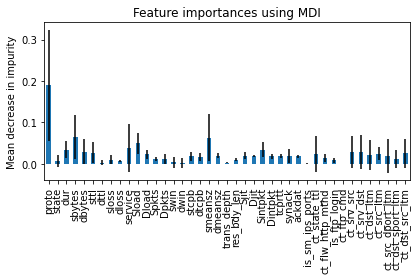

In [62]:
forest_importances = pd.Series(importances, index=feature_names)

fig, ax = plt.subplots()
forest_importances.plot.bar(yerr=std, ax=ax)
ax.set_title("Feature importances using MDI")
ax.set_ylabel("Mean decrease in impurity")
fig.tight_layout()

#### Permutation Feature Importance technique

In [63]:
start_time = time.time()
result = permutation_importance(
    forest, X_test, y_test, n_repeats=10, random_state=1, n_jobs=2
)
elapsed_time = time.time() - start_time
print(f"Elapsed time to compute the importances: {elapsed_time:.3f} seconds")

forest_importances = pd.Series(result.importances_mean, index=feature_names)

Elapsed time to compute the importances: 1001.226 seconds


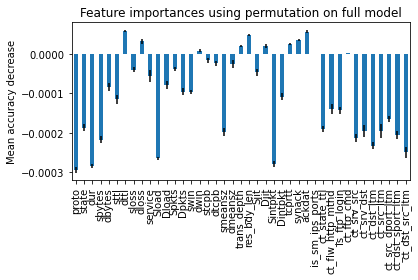

In [64]:
fig, ax = plt.subplots()
forest_importances.plot.bar(yerr=result.importances_std, ax=ax)
ax.set_title("Feature importances using permutation on full model")
ax.set_ylabel("Mean accuracy decrease")
fig.tight_layout()
plt.show()

### Top 7 features for DoS attack
*'proto','dur','Sintpkt','Sload','service','sbytes','smeansz'

#### Decision Tree

In [76]:
X = df[['proto','dur','Sintpkt','Sload','service','sbytes','smeansz']]
y = df['is_dos']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

In [77]:
start_time = time.time()

classifier = DecisionTreeClassifier()
classifier.fit(X_train,y_train)

elapsed_time = time.time() - start_time
print(f"Elapsed time to train the Decision Tree model: {elapsed_time:.3f} seconds")

Elapsed time to train the Decision Tree model: 13.213 seconds


In [78]:
y_pred = classifier.predict(X_test)

In [79]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.99      1.00      1.00    757081
           1       0.27      0.07      0.11      4934

    accuracy                           0.99    762015
   macro avg       0.63      0.53      0.55    762015
weighted avg       0.99      0.99      0.99    762015



#### Random Forest

In [80]:
start_time = time.time()

forest = RandomForestClassifier(random_state=1)
forest.fit(X_train, y_train)

elapsed_time = time.time() - start_time
print(f"Elapsed time to train the Random Forest model: {elapsed_time:.3f} seconds")

Elapsed time to train the Random Forest model: 279.221 seconds


In [81]:
y_rf_pred = forest.predict(X_test)

In [82]:
print(classification_report(y_test, y_rf_pred))

              precision    recall  f1-score   support

           0       0.99      1.00      1.00    757081
           1       0.44      0.04      0.07      4934

    accuracy                           0.99    762015
   macro avg       0.72      0.52      0.53    762015
weighted avg       0.99      0.99      0.99    762015



### Backdoor Attacks

In [5]:
df['is_backdoor'] = np.where(df['attack_cat'] == 2,1,0)

In [6]:
X = df.drop(columns=['srcip','sport','dstip','dsport','Stime','Ltime','Label','attack_cat','is_backdoor'])
y = df['is_backdoor']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

In [8]:
forest = RandomForestClassifier(random_state=1)
forest.fit(X_train, y_train)

RandomForestClassifier(random_state=1)

In [10]:
feature_names = list(X_train.columns)

In [13]:
start_time = time.time()
result = permutation_importance(
    forest, X_test, y_test, n_repeats=10, random_state=1, n_jobs=2
)
elapsed_time = time.time() - start_time
print(f"Elapsed time to compute the importances: {elapsed_time:.3f} seconds")

forest_importances = pd.Series(result.importances_mean, index=feature_names)

Elapsed time to compute the importances: 911.062 seconds


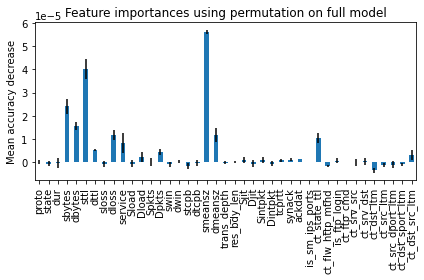

In [14]:
fig, ax = plt.subplots()
forest_importances.plot.bar(yerr=result.importances_std, ax=ax)
ax.set_title("Feature importances using permutation on full model")
ax.set_ylabel("Mean accuracy decrease")
fig.tight_layout()
plt.show()

### Feature Selection Techniques


#### Feature Importance Permutation Techniques

#### Decision Tree

In [ ]:


X = df[['smeansz','sttl','sbytes','dbytes','dmeansz','dloss','ct_state_ttl']]
y = df['is_backdoor']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

In [ ]:
start_time = time.time()

classifier = DecisionTreeClassifier()
classifier.fit(X_train,y_train)

elapsed_time = time.time() - start_time
print(f"Elapsed time to train the Decision Tree model: {elapsed_time:.3f} seconds")

In [ ]:
y_pred = classifier.predict(X_test)

In [ ]:
print(classification_report(y_test, y_pred))

#### Random Forest

In [ ]:
start_time = time.time()

forest = RandomForestClassifier(random_state=1)
forest.fit(X_train, y_train)

elapsed_time = time.time() - start_time
print(f"Elapsed time to train the Random Forest model: {elapsed_time:.3f} seconds")

In [ ]:
y_rf_pred = forest.predict(X_test)

In [ ]:
print(classification_report(y_test, y_rf_pred))

### Analysis Attack

In [17]:
df['is_analysis'] = np.where(df['attack_cat'] == 5,1,0)

In [18]:
X = df.drop(columns=['srcip','sport','dstip','dsport','Stime','Ltime','Label','attack_cat','is_analysis'])
y = df['is_analysis']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

In [19]:
forest = RandomForestClassifier(random_state=1)
forest.fit(X_train, y_train)

RandomForestClassifier(random_state=1)

In [20]:
feature_names = list(X_train.columns)

In [21]:
start_time = time.time()
result = permutation_importance(
    forest, X_test, y_test, n_repeats=10, random_state=1, n_jobs=2
)
elapsed_time = time.time() - start_time
print(f"Elapsed time to compute the importances: {elapsed_time:.3f} seconds")

forest_importances = pd.Series(result.importances_mean, index=feature_names)

Elapsed time to compute the importances: 885.308 seconds


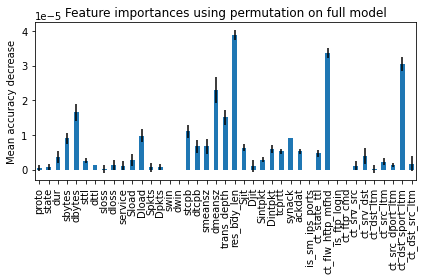

In [22]:
fig, ax = plt.subplots()
forest_importances.plot.bar(yerr=result.importances_std, ax=ax)
ax.set_title("Feature importances using permutation on full model")
ax.set_ylabel("Mean accuracy decrease")
fig.tight_layout()
plt.show()

#### Decision Tree

In [ ]:
df['is_analysis'] = np.where(df['attack_cat'] == 5,1,0)

X = df[['res_bdy_len','ct_flw_http_mthd','ct_dst_sport_ltm','dmeansz','dbytes','trans_depth','stcpb']]
y = df['is_analysis']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

In [ ]:
start_time = time.time()

classifier = DecisionTreeClassifier()
classifier.fit(X_train,y_train)

elapsed_time = time.time() - start_time
print(f"Elapsed time to train the Decision Tree model: {elapsed_time:.3f} seconds")

In [ ]:
y_pred = classifier.predict(X_test)

In [ ]:
print(classification_report(y_test, y_pred))

#### Random Forest

In [ ]:
start_time = time.time()

forest = RandomForestClassifier(random_state=1)
forest.fit(X_train, y_train)

elapsed_time = time.time() - start_time
print(f"Elapsed time to train the Random Forest model: {elapsed_time:.3f} seconds")

In [ ]:
y_rf_pred = forest.predict(X_test)

In [ ]:
print(classification_report(y_test, y_rf_pred))